In [292]:
# pandas et les series tomporelles

In [294]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [296]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col = 'Date', parse_dates= True)
# dans le tableau csv l'index c'est la colonne date et j'ai preciser a pandas que la colonne date c'est une date

In [298]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [300]:
bitcoin.iloc[ 0 , 0]
bitcoin.loc[ '2017', 'Open' ].head()

Date
2017-01-01     913.700012
2017-01-02     946.469971
2017-01-03     973.479980
2017-01-04     990.369995
2017-01-05    1073.810059
Name: Open, dtype: float64

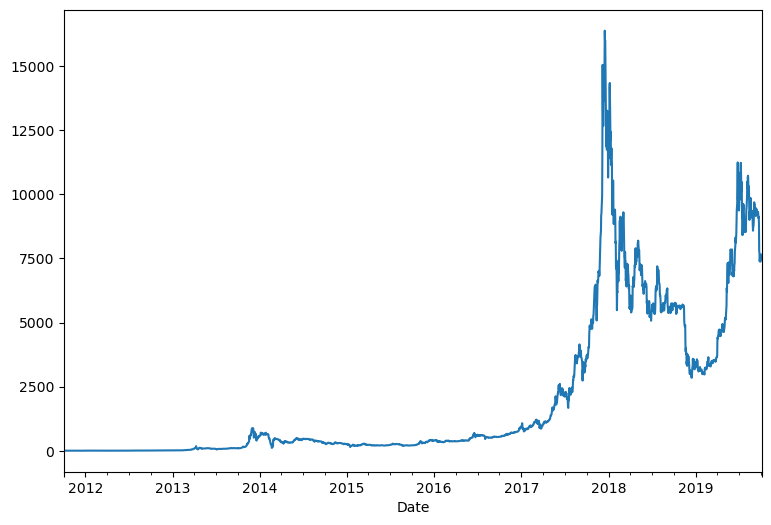

In [302]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [303]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

<Axes: xlabel='Date'>

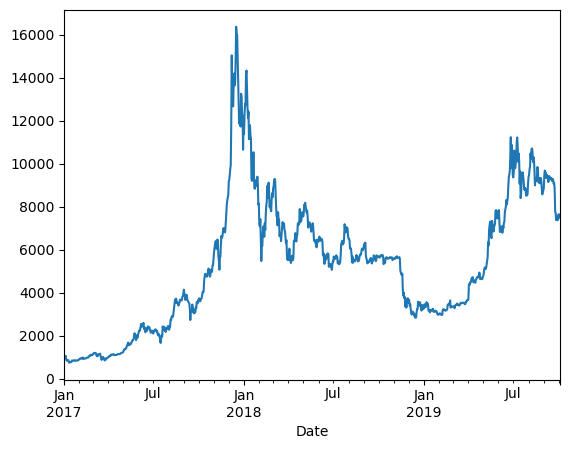

In [306]:
bitcoin.loc['2017' : '2019', 'Close'].plot()

In [307]:
# La fonction resample permet de regrouper les données selon une fréquence temporelle

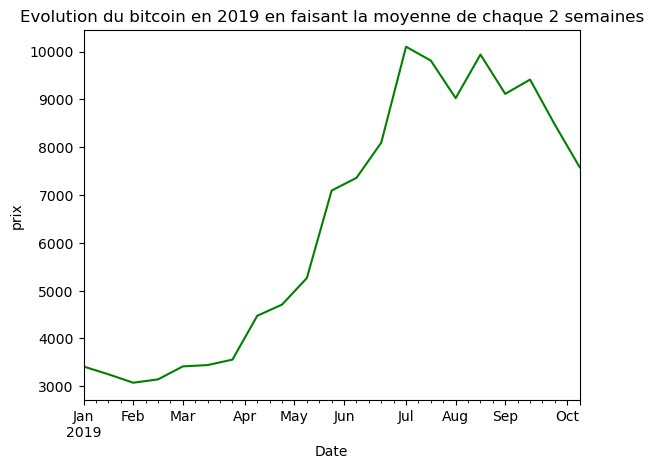

In [308]:
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot(c='g')
plt.title('Evolution du bitcoin en 2019 en faisant la moyenne de chaque 2 semaines')
plt.ylabel('prix')
plt.show()

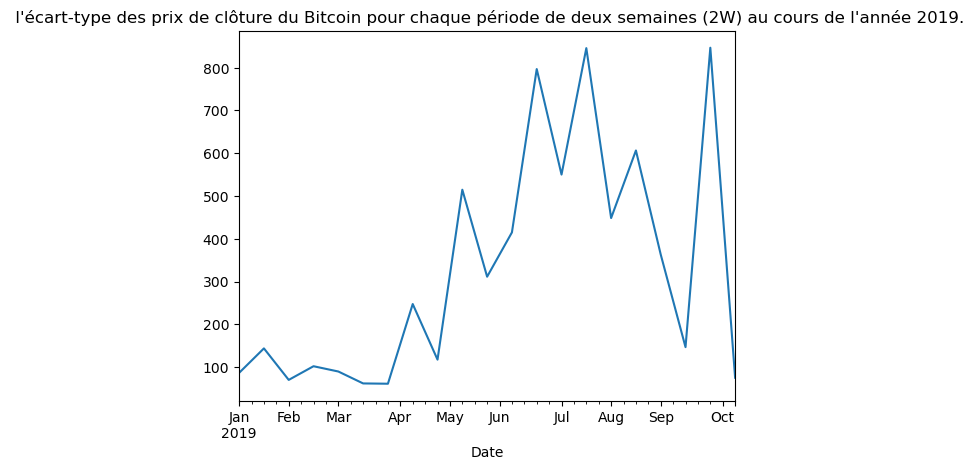

"\nCe graphique nous permets de voir dans quelles périodes, en 2019,les prix de clôture du Bitcoin \nont été les plus volatils (écart-type élevé) ou les plus stables (écart-type faible).\nplus l'écart-type est élevé, plus les prix varient fortement autour de la moyenne dans cette période de deux semaines.\n"

In [311]:

bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.title (" l'écart-type des prix de clôture du Bitcoin pour chaque période de deux semaines (2W) au cours de l'année 2019.")
plt.show()
'''
Ce graphique nous permets de voir dans quelles périodes, en 2019,les prix de clôture du Bitcoin 
ont été les plus volatils (écart-type élevé) ou les plus stables (écart-type faible).
plus l'écart-type est élevé, plus les prix varient fortement autour de la moyenne dans cette période de deux semaines.
'''

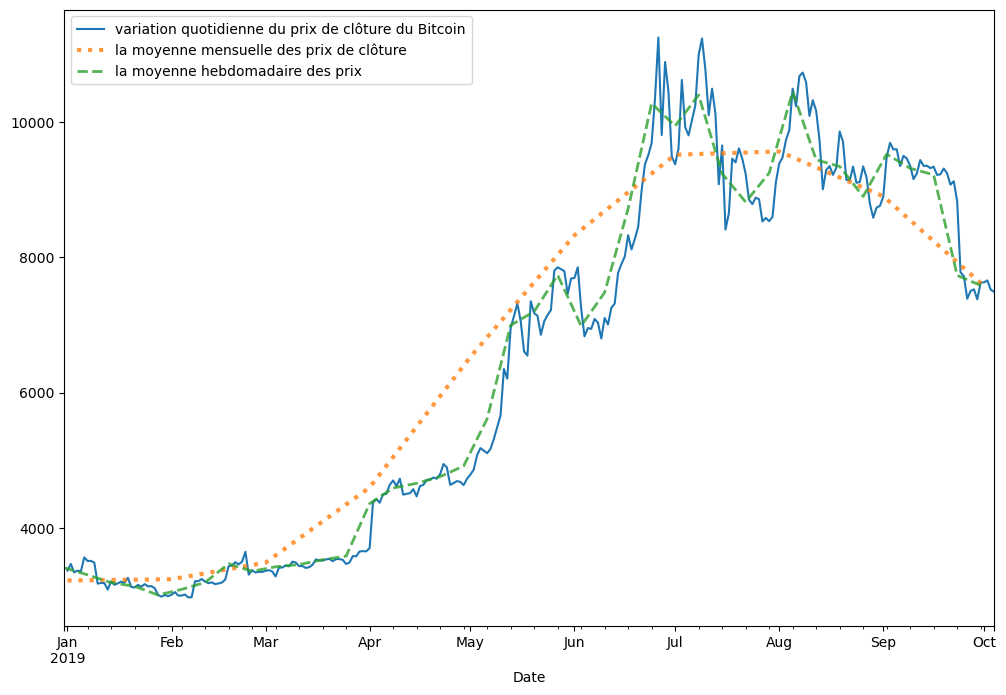

In [313]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot(label='variation quotidienne du prix de clôture du Bitcoin')
bitcoin.loc['2019', 'Close'].resample('ME').mean().plot(label='la moyenne mensuelle des prix de clôture ', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019','Close'].resample('W').mean().plot(label= 'la moyenne hebdomadaire des prix', lw=2, ls='--', alpha=0.8)
plt.legend() 
plt.show()
     

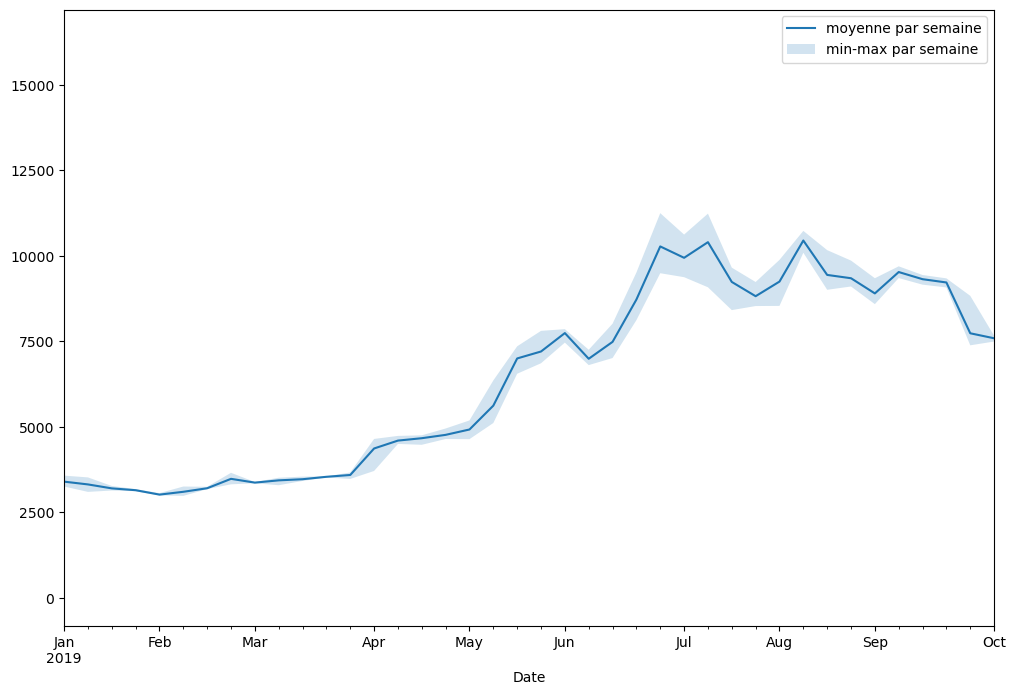

In [314]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()
     
                                    

<Axes: xlabel='Date'>

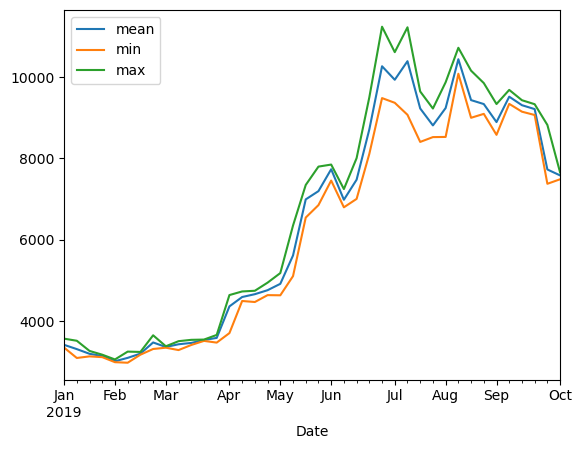

In [316]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean','min','max']).plot()

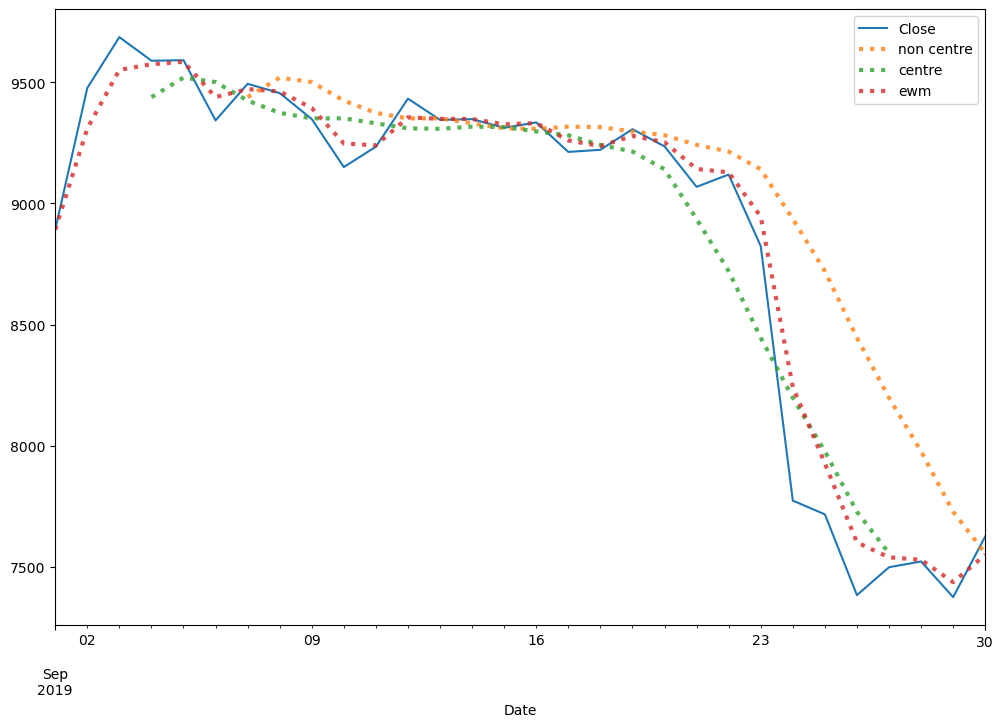

In [317]:
# rooling average 
plt.figure(figsize = (12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window= 7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()


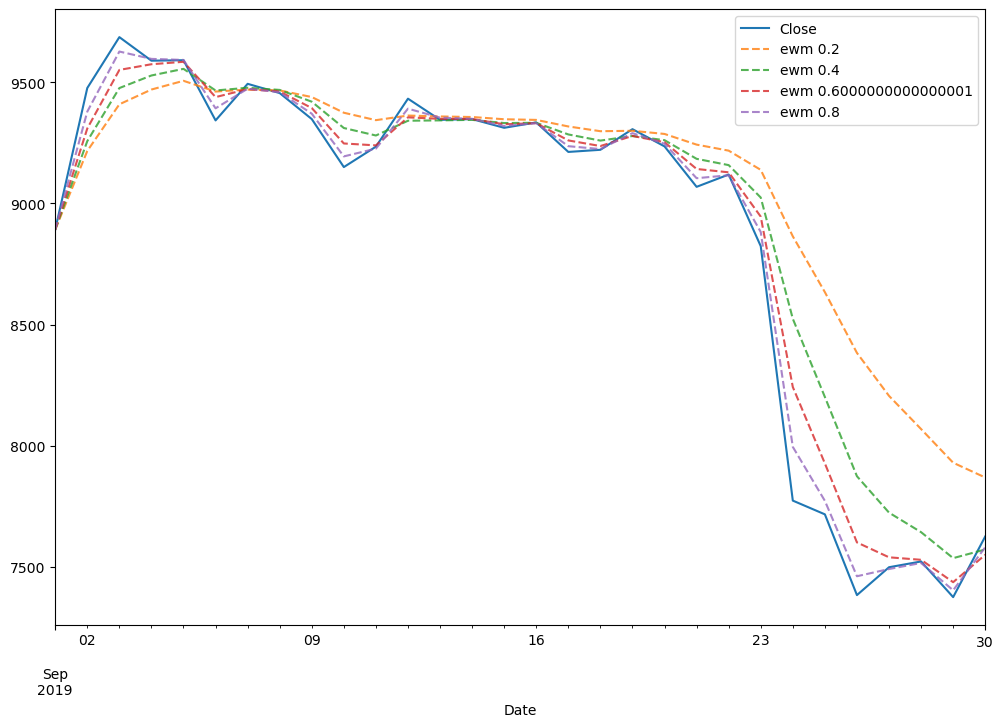

In [319]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

In [320]:
# assemblage de 2 dataframes 

In [322]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col ='Date', parse_dates=True)

In [324]:
btc_eth = pd.merge(bitcoin, ethereum, on ='Date', how='inner',suffixes= ('_btc','_eth'))

In [325]:
print(bitcoin.shape)
print(ethereum.shape)
print(btc_eth.shape)
btc_eth.head()


(2923, 6)
(1520, 6)
(1519, 12)


,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593,20.000,0.5930,2.56,2.56,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560,2.598,0.5616,0.65,0.65,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650,0.800,0.5235,0.70,0.70,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700,0.750,0.5850,0.68,0.68,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680,1.008,0.5915,0.95,0.95,21607


<Axes: xlabel='Date'>

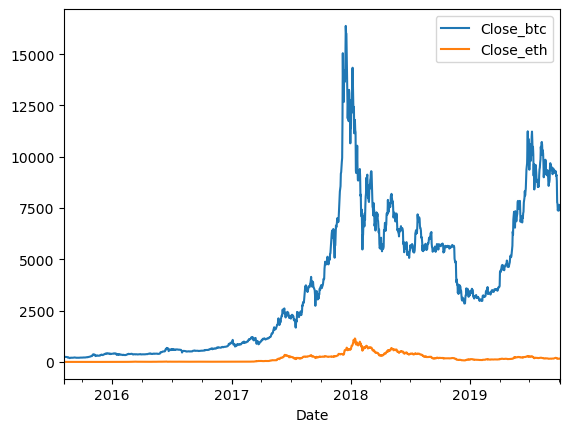

In [327]:
btc_eth[['Close_btc','Close_eth']].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

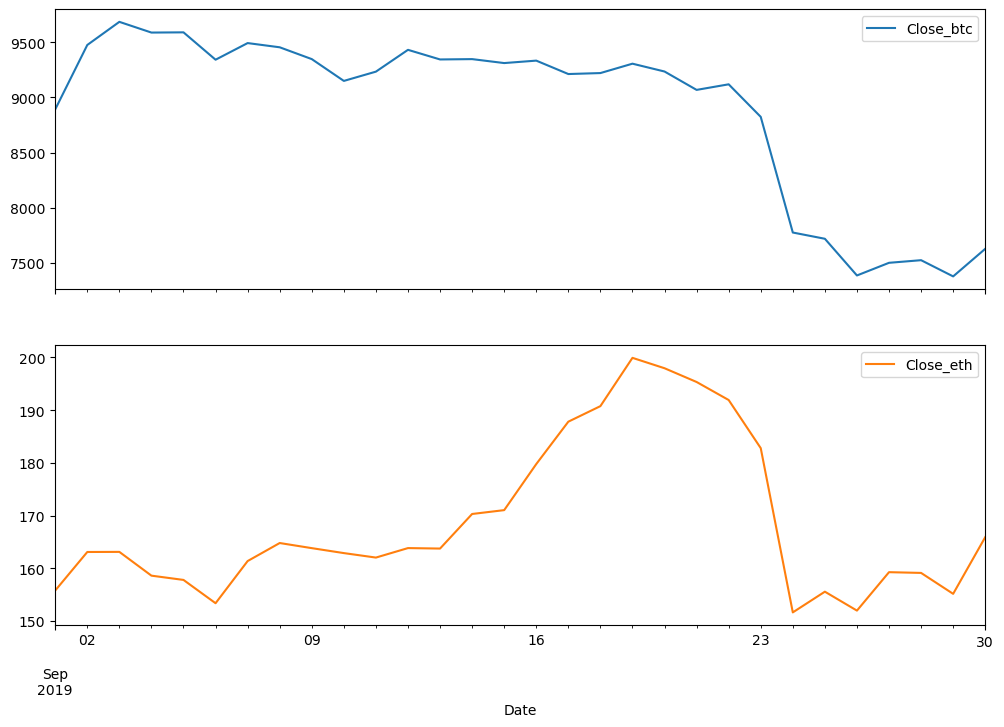

In [328]:
btc_eth[['Close_btc', 'Close_eth']].loc['2019-09'].plot(subplots=True, figsize=(12, 8))

In [334]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.791416
Close_eth,0.791416,1.000000


In [335]:
'''
Effectuer la stratégie de la tortue afin de décider quand acheter ou vendre du
Bitcoin en fonction de la valeur de clôture par rapport au minimum ou au maximum des 28 derniers jours. Indices :

UTILISE LA FONCTION ROLLING()
Boolean indexing :
Si la clôture > maximum des 28 jours, alors buy = 1
Si la clôture < minimum des 28 jours, alors sell = -1
En bonus :
Utiliser la méthode shift, qui me permet de décaler mes fenêtres 
d'un certain nombre de jours que je désire, afin de prendre une décision 1 jour à l'avance.
'''

"\nEffectuer la stratégie de la tortue afin de décider quand acheter ou vendre du\nBitcoin en fonction de la valeur de clôture par rapport au minimum ou au maximum des 28 derniers jours. Indices :\n\nUTILISE LA FONCTION ROLLING()\nBoolean indexing :\nSi la clôture > maximum des 28 jours, alors buy = 1\nSi la clôture < minimum des 28 jours, alors sell = -1\nEn bonus :\nUtiliser la méthode shift, qui me permet de décaler mes fenêtres \nd'un certain nombre de jours que je désire, afin de prendre une décision 1 jour à l'avance.\n"

In [336]:
# creation d'une copy du dataframe BITCOIN 
data = bitcoin.copy()
# initialiser les colonnes buy et sell avec des 0
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

data.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell
Date,,,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357,0.0,0.0
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349,0.0,0.0
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642,0.0,0.0
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135,0.0,0.0
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007,0.0,0.0


In [352]:
# Calculer le RollingMax et le RollingMin, en décalant la série de clôture d'un jour
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
# Définir les signaux d'achat et de vente
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1
data.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell,RollingMax,RollingMin
Date,,,,,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357,0.0,0.0,NaN,NaN
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349,0.0,0.0,NaN,NaN
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642,0.0,0.0,NaN,NaN
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135,0.0,0.0,NaN,NaN
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007,0.0,0.0,NaN,NaN


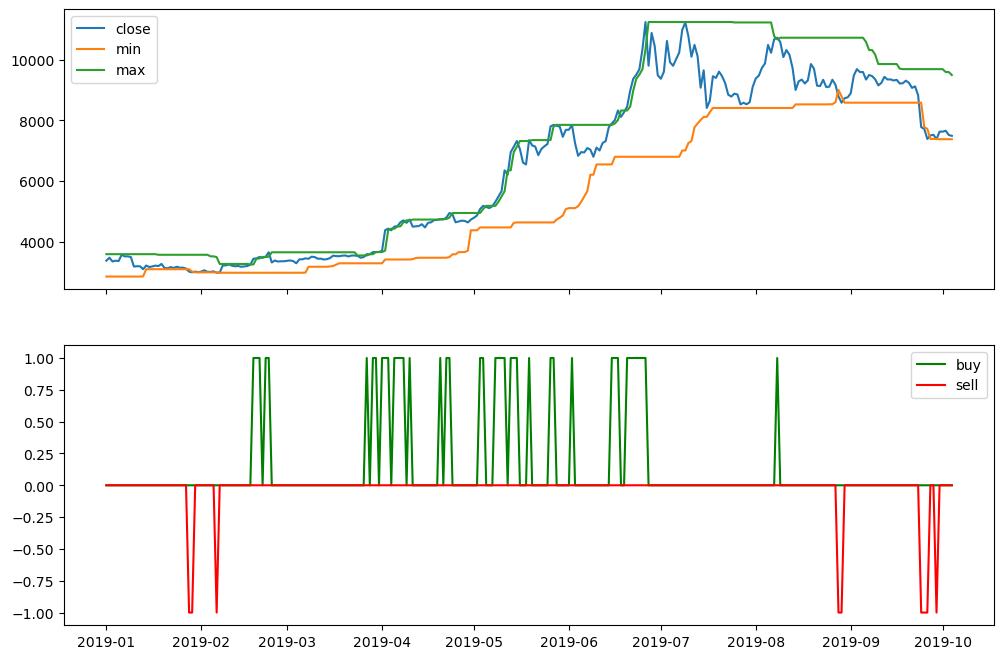

In [339]:
start ='2019'
end = '2019'
fig, ax= plt.subplots(2, figsize=(12, 8), sharex= True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])
     